In [1]:
# from solutions.logistic import LogisticRegression # your source code
from logreg import LogisticRegression

from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import numpy as np

In [2]:
def draw_line(w, x_min, x_max, color="black", ax=None, alpha=1):
  x = np.linspace(x_min, x_max, 101)
  y = -(w[0]*x + w[2])/w[1]
  if ax is None:
    plt.plot(x, y, color = color, alpha=alpha)
  else:
    ax.plot(x, y, color = color, alpha=alpha)

## Experiments 

### Experiment 1: Alpha Too Large

In this experiment I train two models on the same data with the same intitial weights and the same number of epochs in order to demonstrate what can happen when alpha is too high.

In the charts and graohs below, the blue corresponds to the model trained with alpha=10 and the red corresponds with alpha=20.

In the scatter plots, I plot all of the best fit lines, increasing the opacity of the lines to 100% as we approach the final epoch. In the alpha=10 plot, we see that the line quickly finds roughly where it needs to be and then makes very small changes it approaches the optimal line. In the alpha=20 plot, the best fit lines are all over the place. We see why if we look at the loss graph. Everytime the alpha=20 model gets close to a very low loss, it passes the minimum and the loss jumps back up again. 

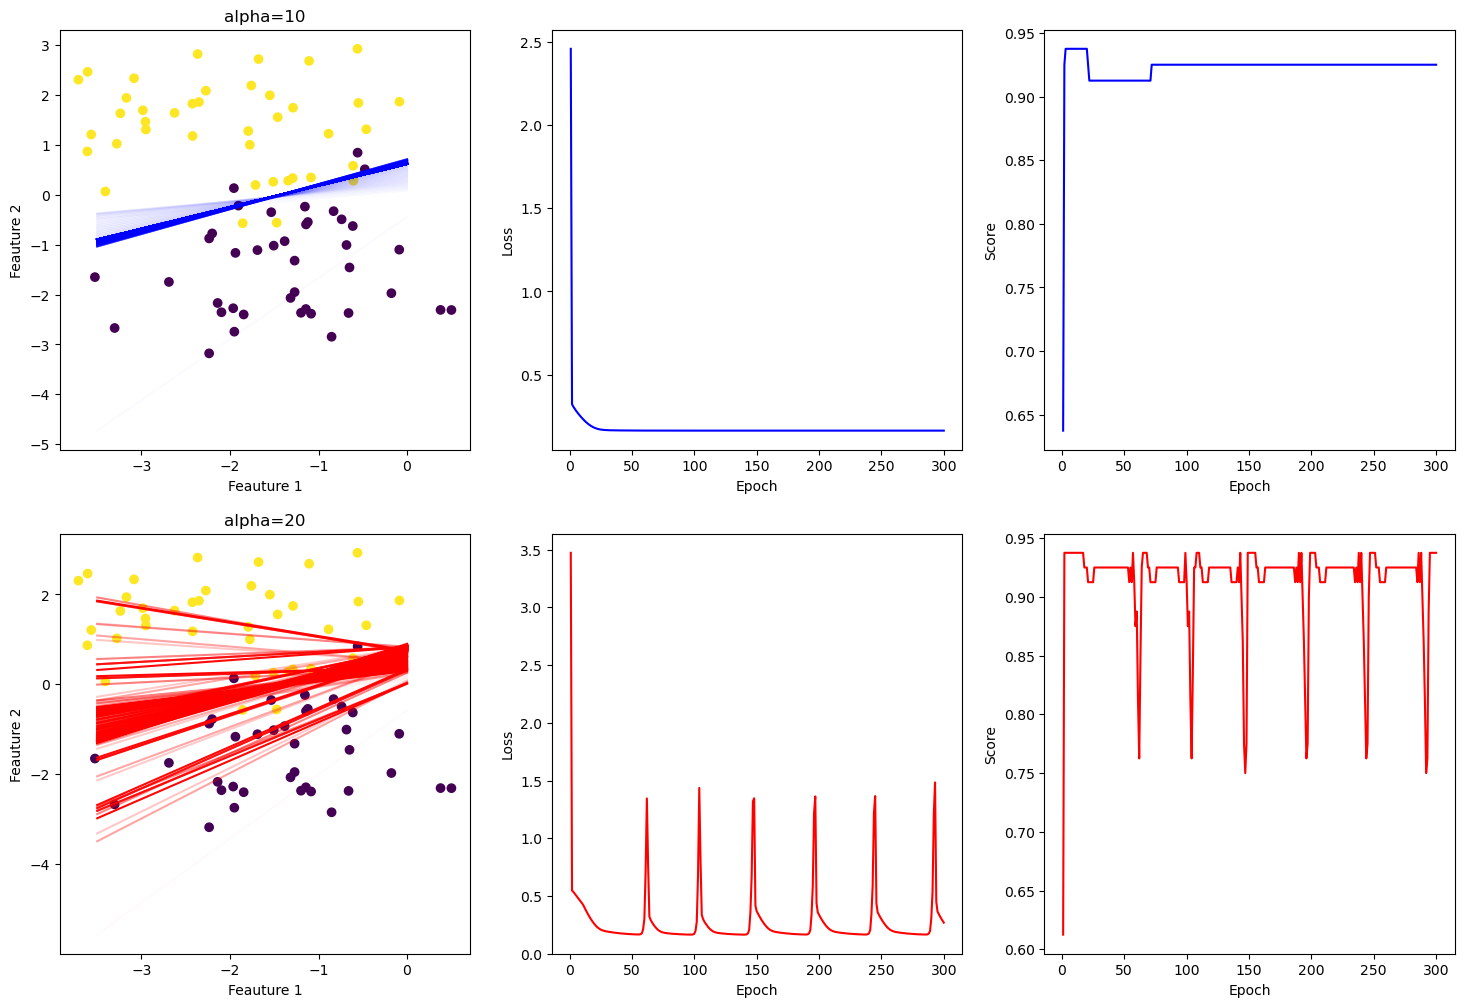

In [18]:
np.random.seed(38532555)
p_features = 3
X, y = make_blobs(n_samples = 80, n_features = p_features - 1, centers = [(-1.5, -1.5), (-2, 1.5)])

steps=300
# train normal logistic regression
reg_alpha_LR = LogisticRegression()
reg_alpha_LR.fit(X, y, initial_w=np.array([1, 1, -1]), alpha = 10, max_epochs = steps, track_w=True)

# train high alpha logistic regression
high_alpha_LR = LogisticRegression()
high_alpha_LR.fit(X, y, initial_w=np.array([1, 1, -1]), alpha = 20, max_epochs = steps, track_w=True)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(18, 12))

# figs 1 and 2
fig1 = ax1.scatter(X[:,0], X[:,1], c = y)
fig4 = ax4.scatter(X[:,0], X[:,1], c = y)
for i, (wi1, wi2) in enumerate(zip(reg_alpha_LR.w_history, high_alpha_LR.w_history)):
    fig1 = draw_line(wi1, -3.5, 0, "blue", ax=ax1, alpha=((i+1+5)/(steps+5)))
    fig4 = draw_line(wi2, -3.5, 0, "red", ax=ax4, alpha=((i+1+5)/(steps+5)))
    
ax1.set(xlabel='Feauture 1', ylabel='Feauture 2', title="alpha=10")
ax4.set(xlabel='Feauture 1', ylabel='Feauture 2', title="alpha=20")

# fig 2
num_steps = len(reg_alpha_LR.loss_history)
ax2.plot(np.arange(num_steps) + 1, reg_alpha_LR.loss_history, color="blue")
ax2.set(xlabel='Epoch', ylabel='Loss')

#fig 5
num_steps = len(high_alpha_LR.loss_history)
ax5.plot(np.arange(num_steps) + 1, high_alpha_LR.loss_history, color="red")
ax5.set(xlabel='Epoch', ylabel='Loss')

# fig 3
num_steps = len(reg_alpha_LR.score_history)
ax3.plot(np.arange(num_steps) + 1, reg_alpha_LR.score_history, color="blue")
ax3.set(xlabel='Epoch', ylabel='Score')

# fig 6
num_steps = len(high_alpha_LR.score_history)
ax6.plot(np.arange(num_steps) + 1, high_alpha_LR.score_history, color="red")
ax6.set(xlabel='Epoch', ylabel='Score')
None

### Experiment 2 and 3: Batch Size and Momentum

In this experiment I will demonstrate how small batch gradient descent can boost the speed of an algorithm, and then how momentum can boost speed on top of that.

All models are trained with the same data, starting weights, and number of epochs.

The data has five features, so I will not be showing any best fit lines. Instead, I chart the loss and score histories. These cleary show how the non sped up gradient descent has not even come close to reaching a minimum after 250 epochs. The stochasitc descent took over 200 epochs, but the stochastic with momentum took only about 50.  

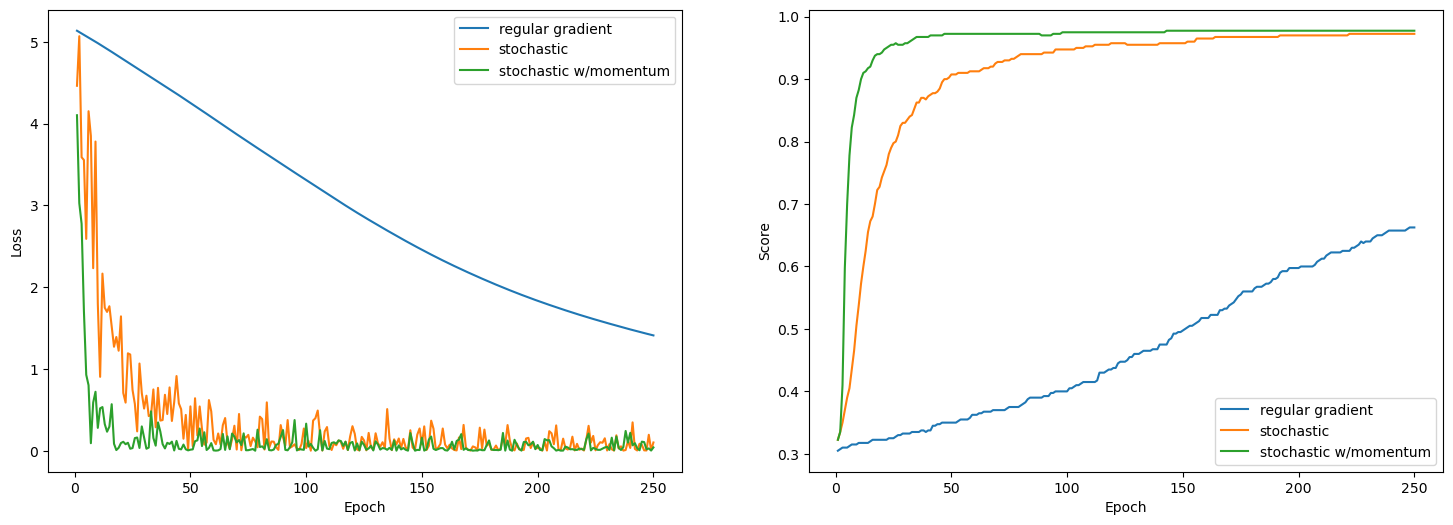

In [4]:
np.random.seed(385325)
p_features = 6
X, y = make_blobs(n_samples = 400, n_features = p_features - 1, centers = [(-1, 1, 0, -1, -1), (1, -1, 2, 1, 1)])

steps=250
# train normal logistic regression
reg_LR = LogisticRegression()
reg_LR.fit(X, y, initial_w=[-1, 4, -4, 1, 3, -1], alpha = .01, max_epochs = steps)

# train small batch logistic regression
stochastic_LR = LogisticRegression()
stochastic_LR.fit_stochastic(X, y, initial_w=[-1, 4, -4, 1, 3, -1], batch_size=25, alpha = .01, max_epochs = steps)

# train small batch logistic regression with momentum
stoch_momentum_LR = LogisticRegression()
stoch_momentum_LR.fit_stochastic(X, y, initial_w=[-1, 4, -4, 1, 3, -1], momentum=.8, batch_size=25, alpha = .01, max_epochs = steps)

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(18, 6))

# fig 2
num_steps = len(reg_LR.loss_history)
ax2.plot(np.arange(num_steps) + 1, reg_LR.loss_history, label="regular gradient")
ax2.plot(np.arange(num_steps) + 1, stochastic_LR.loss_history, label="stochastic")
ax2.plot(np.arange(num_steps) + 1, stoch_momentum_LR.loss_history, label="stochastic w/momentum")
ax2.set(xlabel='Epoch', ylabel='Loss')
legend = ax2.legend() 

# fig 3
num_steps = len(reg_LR.score_history)
ax3.plot(np.arange(num_steps) + 1, reg_LR.score_history, label="regular gradient")
ax3.plot(np.arange(num_steps) + 1, stochastic_LR.score_history, label="stochastic")
ax3.plot(np.arange(num_steps) + 1, stoch_momentum_LR.score_history, label="stochastic w/momentum")
ax3.set(xlabel='Epoch', ylabel='Score')
legend = ax3.legend() 